In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline 
import os
import re
os.chdir("./Desktop/ArticleClassifier")

# Changing the kernels being used and the c values

# Preprocessing the Data

In [ ]:
# Run through 70% of the text files from each category (folder)
# 70% Training, 30% Testing for each category
#Creates training_titles and testing_tiles
training_titles_files = []
testing_titles_files = [] 

business_files = os.listdir("./business")
train_business = business_files[0:358]
test_business = business_files[358:] # length = 152, TOTAL = 510 
training_titles_files.append(train_business)
testing_titles_files.append(test_business)

entertainment_files = os.listdir("./entertainment")
train_entertainment = entertainment_files[0:270]
test_entertainment = entertainment_files[270:] # 116, TOTAL = 386
training_titles_files.append(train_entertainment)
testing_titles_files.append(test_entertainment)

politics_files = os.listdir("./politics")
train_politics = politics_files[0:293]
test_politics = politics_files[293:] # 124, TOTAL = 417
training_titles_files.append(train_politics)
testing_titles_files.append(test_politics)

sport_files = os.listdir("./sport")
train_sport = sport_files[0:359]
test_sport = sport_files[359:] # 152, TOTAL = 511
training_titles_files.append(train_sport)
testing_titles_files.append(test_sport)

tech_files = os.listdir("./tech")
train_tech = tech_files[0:281]
test_tech = tech_files[281:] # 120, TOTAL = 401
training_titles_files.append(train_tech)
testing_titles_files.append(test_tech)

In [ ]:
training_text_file = open("trainingTextFile.txt", "w")

classes = 1
for i in training_titles_files:
	folder_name = ""
	if (classes == 1): 
		folder_name = "business"
	elif (classes == 2):
		folder_name = "entertainment"
	elif (classes == 3):
		folder_name = "politics"
	elif (classes == 4):
		folder_name = "sport"
	elif (classes == 5):
		folder_name = "tech"
	for file_name in i:
		file = "./" + folder_name + "/" + file_name
		#print(file)
		opened = open(file, "r")
		training_text_file.write(opened.readline())
		opened.close()
	classes = classes + 1

training_text_file.close()

masterTestDataFile = open("testTextFile.txt", "w")

classes = 1
for i in testing_titles_files:
	folder_name = ""
	if (classes == 1): 
		folder_name = "business"
	elif (classes == 2):
		folder_name = "entertainment"
	elif (classes == 3):
		folder_name = "politics"
	elif (classes == 4):
		folder_name = "sport"
	elif (classes == 5):
		folder_name = "tech"
	for file_name in i:
		file = "./" + folder_name + "/" + file_name
		#print (file)
		opened = open(file, "r")
		lineRead = opened.readline()
		#try: 
		masterTestDataFile.write(lineRead)
		#except UnicodeDecodeError:
		opened.close()
	classes = classes + 1

masterTestDataFile.close()

#currency stemming nlp

In [ ]:
training = []
testing = []

# Puts words in dictionary, key = word, value = index
trfile = open("trainingTextFile.txt", "r")

for line in trfile:
	line = line.replace("'", "")
	new_line = line.split()
	for i in new_line:
		training.append(i)

trfile.close()

words = {}
count = 0
for i in training:
	if i not in words:
		words[i] = count
		count = count + 1

In [131]:
#Create Training Data Matrix
d = len(words) # Number of features (unique words) we have in the dictionary
# print(d)
train_x = []

trfile = open("trainingTextFile.txt", "r")

for line in trfile:
	line = line.replace("'", "")
	word = line.split()
	arr = [0] * d
	for i in word:
		index = words[i]
		arr[index] = arr[index] + 1
	train_x.append(arr)
trfile.close()

In [132]:
#Target Training Vector
train_y = np.zeros((1561, 1))
for i in range(0, 1561):
    if i >=0 and i < 358:
        train_y[i] = 1
    elif i >= 358 and i < 628:
        train_y[i] = 2
    elif i >= 628 and i < 921:
        train_y[i] = 3
    elif i >= 921 and i < 1280:
        train_y[i] = 4
    elif i >= 1280 and i < 1561:
        train_y[i] = 5
print(train_y[1])

[1.]


In [133]:
#Create Testing Data Matrix
test_x = []

testfile = open("testTextFile.txt", "r")

for line in testfile:
	line = line.replace("'", "")
	word = line.split()
	arr = [0] * d
	for i in word:
		if i in words:
			index = words[i]
			arr[index] = arr[index] + 1
	test_x.append(arr)

testfile.close()

In [134]:
#Target Test Vector
test_y = np.zeros((664, 1))
for i in range(0, 664):
    if i >= 0 and i < 152:
        test_y[i] = 1
    elif i >= 152 and i < 268:
        test_y[i] = 2
    elif i >= 268 and i < 392:
        test_y[i] = 3
    elif i >= 392 and i < 544:
        test_y[i] = 4
    elif i >= 544 and i < 664:
        test_y[i] = 5
    else:
        test_y[i] = 1

# countzero = 0
# countone = 0
# counttwo = 0
# countthree = 0
# countfour = 0
# for i in test_y:
# 	if i == 0:
# 		countzero+=1
# 	if i == 1:
# 		countone += 1
# 	if i == 2:
# 		counttwo+=1 
# 	if i == 3:
# 		countthree+=1
# 	if i == 4:
# 		countfour +=1

#print(countzero)
#print(countone)
#print(counttwo)
#print(countthree)
#print(countfour)


# y = 0 --> Business
# y = 1 --> Entertainment
# y = 2 --> Politics
# y = 3 --> Sport
# y = 4 --> Tech

print(test_y.shape)

(664, 1)


# SVM using the Linear Kernel

In [135]:
#Training for each classification
train_y_1 = train_y.copy()
train_y_2 = train_y.copy()
train_y_3 = train_y.copy()
train_y_4 = train_y.copy()
train_y_5 = train_y.copy()

# Changing the values that aren't the classified values to 0
train_y_1[train_y_1 != 1] = 0
train_y_2[train_y_2 != 2] = 0
train_y_3[train_y_3 != 3] = 0
train_y_4[train_y_4 != 4] = 0
train_y_5[train_y_5 != 5] = 0

# Changes the correct classification values to 1 so it's easier
train_y_2[train_y_2 == 2] = 1
train_y_3[train_y_3 == 3] = 1
train_y_4[train_y_4 == 4] = 1
train_y_5[train_y_5 == 5] = 1

train_y_1_arr = []
train_y_2_arr = []
train_y_3_arr = []
train_y_4_arr = []
train_y_5_arr = []

for i in range(0, 1561):
    train_y_1_arr.insert(i, int(train_y_1[i][0]))
    train_y_2_arr.insert(i, int(train_y_2[i][0]))
    train_y_3_arr.insert(i, int(train_y_3[i][0]))
    train_y_4_arr.insert(i, int(train_y_4[i][0]))
    train_y_5_arr.insert(i, int(train_y_5[i][0]))


In [136]:
#Test for each classification
test_y_1 = test_y.copy()
test_y_2 = test_y.copy()
test_y_3 = test_y.copy()
test_y_4 = test_y.copy()
test_y_5 = test_y.copy()

# Changing the values that aren't the classified values to 0
test_y_1[test_y_1 != 1] = 0
test_y_2[test_y_2 != 2] = 0
test_y_3[test_y_3 != 3] = 0
test_y_4[test_y_4 != 4] = 0
test_y_5[test_y_5 != 5] = 0

# Changes the correct classification values to 1 so it's easier
test_y_2[test_y_2 == 2] = 1
test_y_3[test_y_3 == 3] = 1
test_y_4[test_y_4 == 4] = 1
test_y_5[test_y_5 == 5] = 1

test_y_1_arr = []
test_y_2_arr = []
test_y_3_arr = []
test_y_4_arr = []
test_y_5_arr = []

for i in range(0, 664):
    test_y_1_arr.insert(i, int(test_y_1[i][0]))
    test_y_2_arr.insert(i, int(test_y_2[i][0]))
    test_y_3_arr.insert(i, int(test_y_3[i][0]))
    test_y_4_arr.insert(i, int(test_y_4[i][0]))
    test_y_5_arr.insert(i, int(test_y_5[i][0]))

In [137]:
    acc_train_svm_linear = []
    acc_test_svm_linear = []
    c_svm_linear = []

In [141]:
def svm_linear(c, X_train, Y_train, X_test, Y_test):

    # TODO - Create an object of svm.SVC(probability = False, kernel = 'linear', C = c) - 5 points
    svc_linear = svm.SVC(probability = True, kernel = 'linear', C = c)
    
    # TODO - Fit the classifier on the training set - 5 points
    svc_linear.fit(X_train, Y_train)
    
    # TODO - Find the prediction and accuracy on the training set - 5 points
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # TODO - Find the prediction and accuracy on the test set - 5 points
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_linear.append(c)
    
    print(svc_linear.predict_proba(test_x))
    

Train Accuracy = 1.000000
Test Accuracy = 0.900602
[[0.70358128 0.29641872]
 [0.70835232 0.29164768]
 [0.06630794 0.93369206]
 ...
 [0.98028012 0.01971988]
 [0.96817905 0.03182095]
 [0.91787804 0.08212196]]
Train Accuracy = 1.000000
Test Accuracy = 0.918675
[[0.92836347 0.07163653]
 [0.95092378 0.04907622]
 [0.98955099 0.01044901]
 ...
 [0.96744509 0.03255491]
 [0.98147235 0.01852765]
 [0.94359721 0.05640279]]
Train Accuracy = 1.000000
Test Accuracy = 0.905120
[[0.98735823 0.01264177]
 [0.96027272 0.03972728]
 [0.98826982 0.01173018]
 ...
 [0.9838727  0.0161273 ]
 [0.97956864 0.02043136]
 [0.89265258 0.10734742]]
Train Accuracy = 1.000000
Test Accuracy = 0.911145
[[0.7835635  0.2164365 ]
 [0.8387176  0.1612824 ]
 [0.9615903  0.0384097 ]
 ...
 [0.9967681  0.0032319 ]
 [0.97632844 0.02367156]
 [0.82140398 0.17859602]]
Train Accuracy = 1.000000
Test Accuracy = 0.917169
[[0.938306   0.061694  ]
 [0.92593396 0.07406604]
 [0.97162092 0.02837908]
 ...
 [0.00353916 0.99646084]
 [0.00802655 0.9

ValueError: x and y must have same first dimension, but have shapes (5,) and (10,)

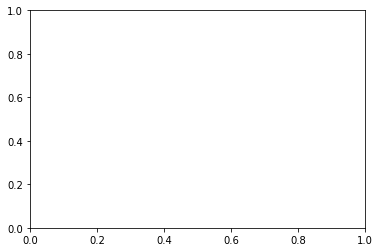

In [142]:
# Call the above function i.e. svm_linear with different values of parameter 'c'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100
#cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]

c = 1
svm_linear(c, train_x, train_y_1_arr, test_x, test_y_1_arr)
svm_linear(c, train_x, train_y_2_arr, test_x, test_y_2_arr)
svm_linear(c, train_x, train_y_3_arr, test_x, test_y_3_arr)
svm_linear(c, train_x, train_y_4_arr, test_x, test_y_4_arr)
svm_linear(c, train_x, train_y_5_arr, test_x, test_y_5_arr)
    
# models = np.arange(1,6)
# plt.plot(models, acc_train_svm_linear, 'ro-') 
# plt.plot(models, acc_test_svm_linear,'bo-') 
# plt.grid()
# plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

# SVM using the Radial Basis Function (RBF) Kernel

In [ ]:
# Complete the function below.
# g is the value of gamma. 
def svm_rbf(c, g):
    # Create an object of svm classifier using svm.SVC()
    # Pass probability = False, kernel = 'rbf', value of C = c and rbf paramter gamma = g.
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c, gamma = g)
    
    # Fit the classifier on the training set.
    svc_rbf.fit(X_train, Y_train)
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_rbf_train = svc_rbf.predict(X_train)
    acc = np.mean(Yhat_svc_rbf_train == Y_train)
    print('Accuracy = {0:f}'.format(acc))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    acc = np.mean(Yhat_svc_rbf_test == Y_test)
    print('Accuracy = {0:f}'.format(acc))
  

In [ ]:
# Call the above function i.e. svm_rbf with different values of parameter 'c' and 'g'.
# Start with smaller values of 'c' say 0.0001, 0.001, 0.01, 0.1, 1, 10, 100

svm_rbf(1, 1)
svm_rbf(10, 10)
svm_rbf(100, 100)

# SVM using the Polynomial Kernel